# Лабораторная работа №7
## по теме
## Решение дифференциальных уравнений вычислительными методами
### Выполнил: Шикри И.Х., группа 429
### Преподователь: Шиндин А. В.
Цель работы: решить методом Тейлора 2-го порядка задачу Коши y''+y=x*$e^{x}$, y(0)=1,y'(0)=0, 0$\le x \le$2. Построить графики y(x),y'(x) и фазовых траекторий.
## Теоретическая часть
### Метод Тейлора
Основная идея для нахождения решения дифференциального уравнения заключается в предположении, что мы можем записать решение в виде степенного ряда $y(x)=\sum_{n=0}^\infty \mathbf{a}_n  x^n$. Через данный ряд найдем производные $y'(x)=\sum_{n=1}^\infty n\mathbf{a}_{n}  x^{n-1}$ и $y''(x)=\sum_{n=2}^\infty n(n-1)\mathbf{a}_{n}  x^{n-2}$.

Теперь приведем все ряды к степени n. При этом изменится начальное n для производных. Получим $y'(x)=\sum_{n=0}^\infty (n+1)\mathbf{a}_{n+1}  x^{n}$ и $y''(x)=\sum_{n=0}^\infty (n+2)(n+1)\mathbf{a}_{n+2}  x^{n}$.

Через начальные условия выразим $\mathbf{a}_0$ и $\mathbf{a}_1$.

Получим $\mathbf{a}_0$=1 и $\mathbf{a}_1$=0 (тк. y'(0) = $\mathbf{a}_1$=0 и y(0) = $\mathbf{a}_0$=1).

Подставим ряды в начальное уравнение и разложим в ряд $x*e^{x}$=$\sum_{n=1}^\infty {x^{n} \over {n-1}!}$.Сократим $x^n$ и получим реккурентную формулу для $\mathbf{a}_n$=${n-2\over n!}$-$\mathbf{a}_{n-2}\over n(n-1)$.

## Практическая часть

### 1. Подключаем необходимые библиотеки

In [56]:
import math
import numpy as np
import matplotlib.pyplot as plt

def drawGraph (xDat,yDat,title,xLabel,yLabel,propertys):
    plt.plot(xDat,yDat,propertys)
    if title:
        plt.title(title)
    if xLabel:
        plt.xlabel(xLabel)
    if yLabel:
        plt.ylabel(yLabel)
    plt.show()

### 2. Функция и её производные в виде рядов

In [57]:
def dydx2(a,x):
    value=0
    for i in range(len(a)):
        if i-2>=0:
            value+=a[i]*(i-1)*i*x**(i-2)
    return value
def dydx(a,x):
    value=0
    for i in range(len(a)):
        if i-1>=0:
            value+=a[i]*i*x**(i-1)
    return value
def y(a,x):
    value=0
    for i in range(len(a)): 
        value+=a[i]*(x**i)
    return value

### 3. Вычисление коэффициентов $\mathbf{a}_n$

In [58]:
a=[]
a.append(1)
a.append(0)
for n in range(2,21):
    a.append(   ((n-2)/math.factorial(n)) - (a[n-2]/(n*(n-1)))  )

### 4. Вычисление значений для графиков

In [59]:
x=np.linspace(0,2,100)

yValues=[y(a,i) for i in x]
yDerValues=[dydx(a,i) for i in x]
yDer2Values=[dydx2(a,i) for i in x]

### 5. Построение графиков y(x),y'(x)

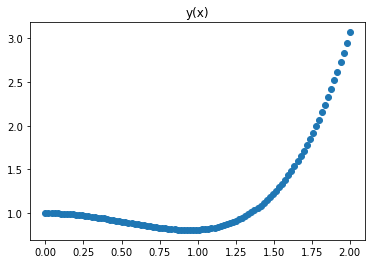

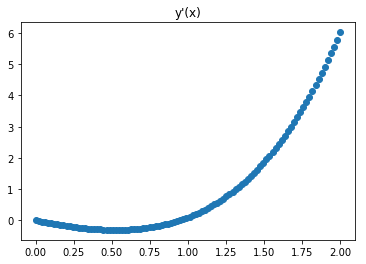

In [60]:
drawGraph (x,yValues,"y(x)",False,False,'o')
drawGraph (x,yDerValues,"y\'(x)",False,False,'o')

### 6. Построение фазовых траекторий

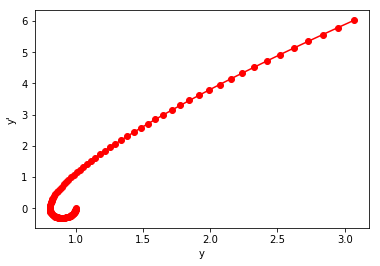

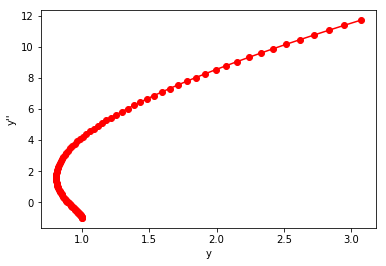

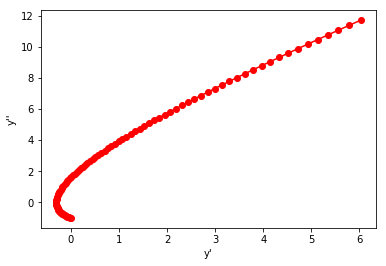

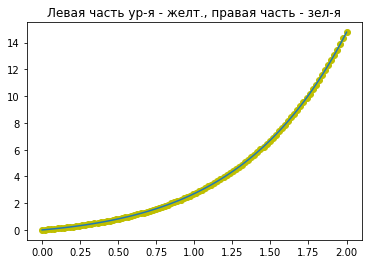

Максимальная невязка: 8.881784197001252e-16
Требуемая точность: 0.01


In [61]:
#фазвоые траектории
drawGraph (yValues,yDerValues,False,"y","y\'",'ro-')
drawGraph (yValues,yDer2Values,False,"y","y\'\'",'ro-')
drawGraph (yDerValues,yDer2Values,False,"y\'","y\'\'",'ro-')



##сопоставление графиков, невязка
yLeft=[q*math.exp(q) for q in x]
ymy=[]
for i in range(len(x)):
    ymy.append(yDer2Values[i]+yValues[i])
plt.title("Левая часть ур-я - желт., правая часть - зел-я")
plt.plot(x,yLeft,'yo',x,ymy,'-')
plt.show()

print("Максимальная невязка:",max(a+b-c for a,b,c in zip(yDer2Values,yValues,yLeft)))
print("Требуемая точность: 0.01")

### Вывод
В ходе данной лабораторной работы был применен на практике метод Тейлора для решения задачи Коши. Были построены графики искомой функции, её производной, а также фазовые траектории.